<a href="https://colab.research.google.com/github/Dimildizio/Adjuface/blob/main/insightface_mona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install onnxruntime
!pip install -U insightface

In [ ]:
!wget "https://drive.usercontent.google.com/download?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&export=download&authuser=0&confirm=t&uuid=35139119-3d89-4018-8440-6aa8164ea6c1&at=APZUnTWyfL6sMsu2KVgMJzFY9QLh%3A1705580253167" -O inswapper_128.onnx

In [3]:
import cv2
import glob
import insightface
import numpy as np

from IPython.display import Image, display
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [4]:
def get_app():
  app = FaceAnalysis(name='buffalo_l')
  app.prepare(ctx_id=0, det_size=(640, 640))
  return app

def get_swapper():
  return insightface.model_zoo.get_model('inswapper_128.onnx', download=False)

In [5]:
def load_face(img_path):
  read_img = cv2.imread(img_path)
  faces = app.get(read_img)
  return faces

In [ ]:
app = get_app()
swapper = get_swapper()

In [7]:
input_img_path = 'a0100.jpg'
target_img_path = 'mona_lisa.png'

In [ ]:
input_img = load_face(input_img_path)

In [9]:
target_img = cv2.imread(target_img_path)
target_faces = app.get(target_img)

In [14]:
def swap_faces(target_img, target_face, source_faces):
  result_img = target_img.copy()
  for num, face in enumerate(source_faces):
    result_img = swapper.get(result_img,
                             target_face,
                             face,
                             paste_back=True)
    cv2.imwrite(f"/content/face_{num}.jpg", result_img)

In [15]:
swap_faces(target_img, target_faces[0], input_img)

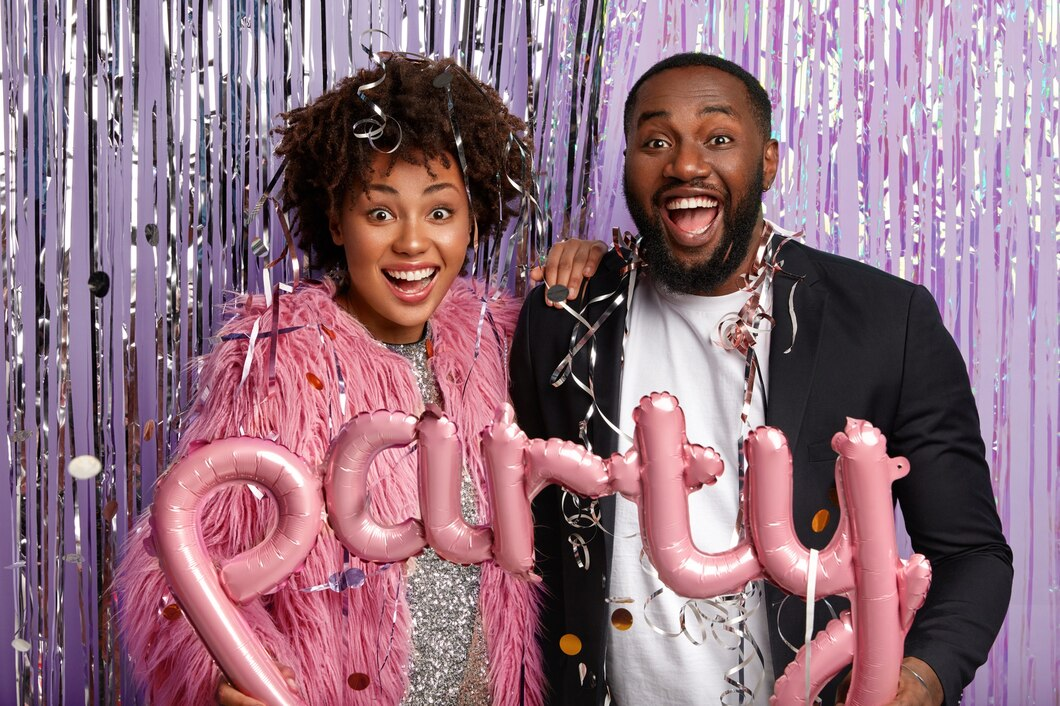

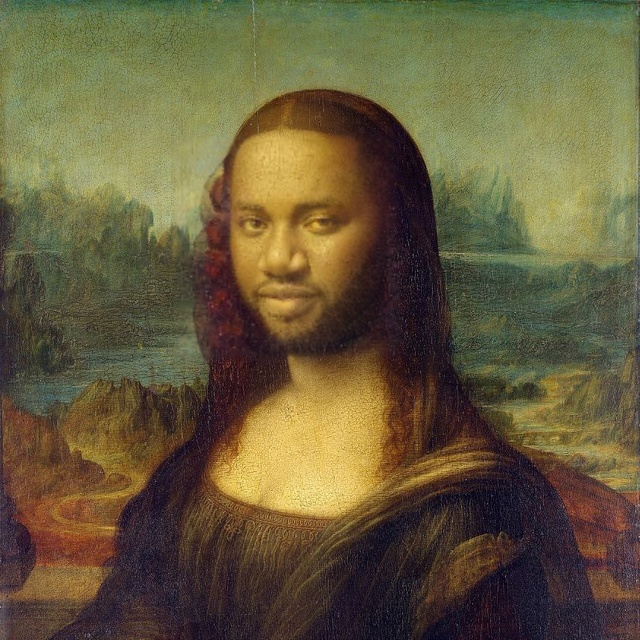

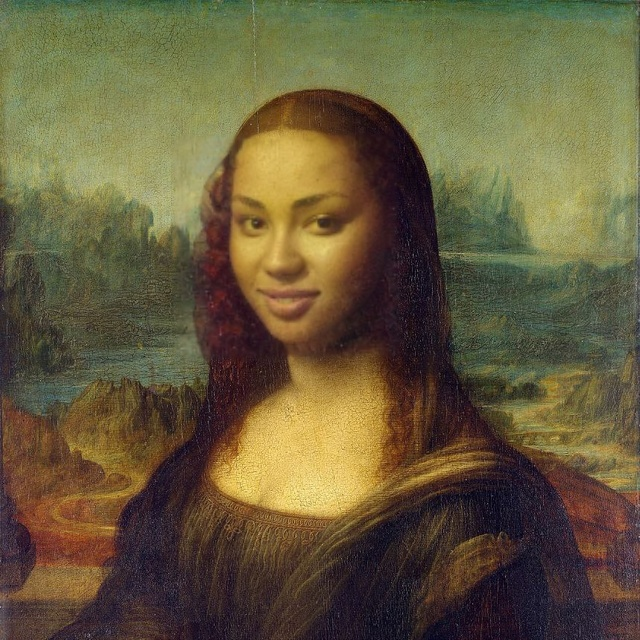

In [25]:
matching_files = glob.glob('*.jpg')
for image_path in sorted(matching_files):
  display(Image(filename=image_path))